Experiemtne with HYCOM netcdf opening

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt 
import datetime
import numpy as np

from salishsea_tools.nowcast import figures, residuals
from salishsea_tools import viz_tools
%matplotlib inline

In [2]:
date = '20150730'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_2ds_forecast_3hrly_diag'.format(date))

In [3]:
f = nc.Dataset(url)

In [4]:
ssh=f.variables['ssh']
time = f.variables['time']
dates=nc.num2date(time[:],time.units)
lon=f.variables['lon']

In [5]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    title: 2D Sfc 3 Hourly Diagnostic 00Z30jul2015: Forecast, downloaded Jul 30 16:15 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Fri Jul 31 20:27:03 UTC 2015 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(2160), lev(1), lon(4320), time(65)
    variables(dimensions): float64 time(time), float64 lev(lev), float64 lat(lat), float64 lon(lon), float32 ssh(time,lev,lat,lon), float32 ice_coverage(time,lev,lat,lon), float32 ice_thickness(time,lev,lat,lon)
    groups: 

In [6]:
lon

<type 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    grads_dim: x
    grads_mapping: linear
    grads_size: 4320
    units: degrees_east
    long_name: longitude
    minimum: 74.16
    maximum: 434.06227
    resolution: 0.08333
unlimited dimensions: 
current shape = (4320,)
filling off

In [7]:
dates

array([datetime.datetime(2015, 7, 30, 0, 0),
       datetime.datetime(2015, 7, 30, 3, 0),
       datetime.datetime(2015, 7, 30, 6, 0),
       datetime.datetime(2015, 7, 30, 9, 0),
       datetime.datetime(2015, 7, 30, 12, 0),
       datetime.datetime(2015, 7, 30, 15, 0),
       datetime.datetime(2015, 7, 30, 18, 0),
       datetime.datetime(2015, 7, 30, 21, 0),
       datetime.datetime(2015, 7, 31, 0, 0),
       datetime.datetime(2015, 7, 31, 3, 0),
       datetime.datetime(2015, 7, 31, 6, 0),
       datetime.datetime(2015, 7, 31, 9, 0),
       datetime.datetime(2015, 7, 31, 12, 0),
       datetime.datetime(2015, 7, 31, 15, 0),
       datetime.datetime(2015, 7, 31, 18, 0),
       datetime.datetime(2015, 7, 31, 21, 0),
       datetime.datetime(2015, 8, 1, 0, 0),
       datetime.datetime(2015, 8, 1, 3, 0),
       datetime.datetime(2015, 8, 1, 6, 0),
       datetime.datetime(2015, 8, 1, 9, 0),
       datetime.datetime(2015, 8, 1, 12, 0),
       datetime.datetime(2015, 8, 1, 15, 0),
      

In [8]:
print time

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    grads_dim: t
    grads_mapping: linear
    grads_size: 65
    grads_min: 00z30jul2015
    grads_step: 3hr
    units: days since 1-1-1 00:00:0.0
    long_name: time
    minimum: 00z30jul2015
    maximum: 00z07aug2015
    resolution: 0.125
unlimited dimensions: 
current shape = (65,)
filling off



In [9]:
print time[:]

[ 735810.     735810.125  735810.25   735810.375  735810.5    735810.625
  735810.75   735810.875  735811.     735811.125  735811.25   735811.375
  735811.5    735811.625  735811.75   735811.875  735812.     735812.125
  735812.25   735812.375  735812.5    735812.625  735812.75   735812.875
  735813.     735813.125  735813.25   735813.375  735813.5    735813.625
  735813.75   735813.875  735814.     735814.125  735814.25   735814.375
  735814.5    735814.625  735814.75   735814.875  735815.     735815.125
  735815.25   735815.375  735815.5    735815.625  735815.75   735815.875
  735816.     735816.125  735816.25   735816.375  735816.5    735816.625
  735816.75   735816.875  735817.     735817.125  735817.25   735817.375
  735817.5    735817.625  735817.75   735817.875  735818.   ]


In [10]:
start = datetime.datetime(1,1,1)
dates2 = [start + datetime.timedelta(days = t) for t in time]

In [11]:
dates2

[datetime.datetime(2015, 8, 1, 0, 0),
 datetime.datetime(2015, 8, 1, 3, 0),
 datetime.datetime(2015, 8, 1, 6, 0),
 datetime.datetime(2015, 8, 1, 9, 0),
 datetime.datetime(2015, 8, 1, 12, 0),
 datetime.datetime(2015, 8, 1, 15, 0),
 datetime.datetime(2015, 8, 1, 18, 0),
 datetime.datetime(2015, 8, 1, 21, 0),
 datetime.datetime(2015, 8, 2, 0, 0),
 datetime.datetime(2015, 8, 2, 3, 0),
 datetime.datetime(2015, 8, 2, 6, 0),
 datetime.datetime(2015, 8, 2, 9, 0),
 datetime.datetime(2015, 8, 2, 12, 0),
 datetime.datetime(2015, 8, 2, 15, 0),
 datetime.datetime(2015, 8, 2, 18, 0),
 datetime.datetime(2015, 8, 2, 21, 0),
 datetime.datetime(2015, 8, 3, 0, 0),
 datetime.datetime(2015, 8, 3, 3, 0),
 datetime.datetime(2015, 8, 3, 6, 0),
 datetime.datetime(2015, 8, 3, 9, 0),
 datetime.datetime(2015, 8, 3, 12, 0),
 datetime.datetime(2015, 8, 3, 15, 0),
 datetime.datetime(2015, 8, 3, 18, 0),
 datetime.datetime(2015, 8, 3, 21, 0),
 datetime.datetime(2015, 8, 4, 0, 0),
 datetime.datetime(2015, 8, 4, 3, 0),


Ok, so there is a problem with how I was reading the date in the text file....

(735807.0, 735813.0)

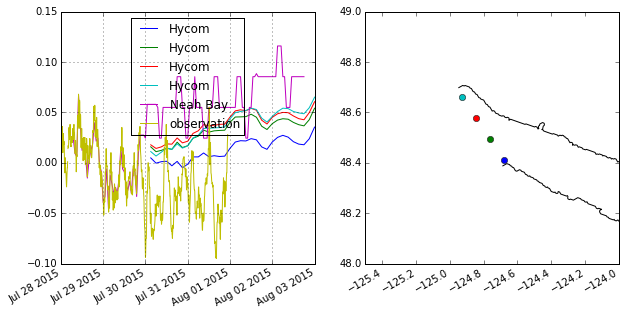

In [12]:
grid_b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

fig,axs= plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
axm=axs[1]
date = datetime.datetime(2015,7,20)

#Hycom
iss = np.arange(1934,1920,-1)
jss = np.arange(1661,1665)
f = nc.Dataset(url)
ssh = f.variables['ssh']
time = f.variables['time']
dates = nc.num2date(time[:],time.units)
lat = f.variables['lat']
lon=f.variables['lon']
for i,j in zip(iss,jss):
    #filename = read_url(date,i,j) read website
    ax.plot(dates,ssh[:,0,j,i],label='Hycom')
    axm.plot(lon[i]-360,lat[j],'o')
viz_tools.plot_coastline(axm,grid_b,coords='map')


#Neah Bay forecast
filename = '/ocean/nsoontie/MEOPAR/sshNeahBay/txt/sshNB_2015-07-29_21.txt'
NBdata = residuals._load_surge_data(filename)
surge, dates = residuals._retrieve_surge(NBdata, datetime.datetime(2015,7,29))
ax.plot(dates[:],surge[:],label = 'Neah Bay')

# Neah Bay observations
obs = figures.get_NOAA_wlevels(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '31-Jul-2015')
tides = figures.get_NOAA_tides(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '31-Jul-2015')

res = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)
ax.plot(obs.time,res,label='observation')


axm.set_xlim([-125.5,-124])
axm.set_ylim([48,49])
ax.legend(loc=0)
ax.grid()
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2015,7,28),datetime.datetime(2015,8,3)])

Hycom forecast slighlty better than NOAA Jul 30/31, but everthing is small
* July 30 forecast gives forecast for July 30 and nowards. 

In [13]:
date = '20150731'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_2ds_forecast_3hrly_diag'.format(date))
f = nc.Dataset(url)
ssh=f.variables['ssh']
time = f.variables['time']
dates=nc.num2date(time[:],time.units)
lon=f.variables['lon']

(735807.0, 735813.0)

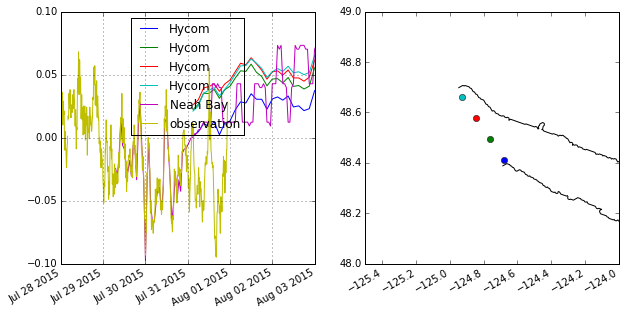

In [14]:
grid_b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

fig,axs= plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
axm=axs[1]
date = datetime.datetime(2015,7,20)

#Hycom
iss = np.arange(1934,1920,-1)
jss = np.arange(1661,1665)
f = nc.Dataset(url)
ssh = f.variables['ssh']
time = f.variables['time']
dates = nc.num2date(time[:],time.units)
lat = f.variables['lat']
lon=f.variables['lon']
for i,j in zip(iss,jss):
    #filename = read_url(date,i,j) read website
    ax.plot(dates,ssh[:,0,j,i],label='Hycom')
    axm.plot(lon[i]-360,lat[j],'o')
viz_tools.plot_coastline(axm,grid_b,coords='map')


#Neah Bay forecast
filename = '/ocean/nsoontie/MEOPAR/sshNeahBay/txt/sshNB_2015-07-30_21.txt'
NBdata = residuals._load_surge_data(filename)
surge, dates = residuals._retrieve_surge(NBdata, datetime.datetime(2015,7,29))
ax.plot(dates[:],surge[:],label = 'Neah Bay')

# Neah Bay observations
obs = figures.get_NOAA_wlevels(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '31-Jul-2015')
tides = figures.get_NOAA_tides(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '31-Jul-2015')

res = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)
ax.plot(obs.time,res,label='observation')


axm.set_xlim([-125.5,-124])
axm.set_ylim([48,49])
ax.legend(loc=0)
ax.grid()
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2015,7,28),datetime.datetime(2015,8,3)])

Jul 31 forecast matches well with NOAA in first part of day. Match with observations is ok...
* July 31 forecast is for July 31 and onwards

#HYCOM Nowcast

In [15]:
date = '20150730'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_2ds_nowcast_3hrly_diag'.format(date))
f = nc.Dataset(url)
ssh=f.variables['ssh']
time = f.variables['time']
dates=nc.num2date(time[:],time.units)
lon=f.variables['lon']

(735807.0, 735813.0)

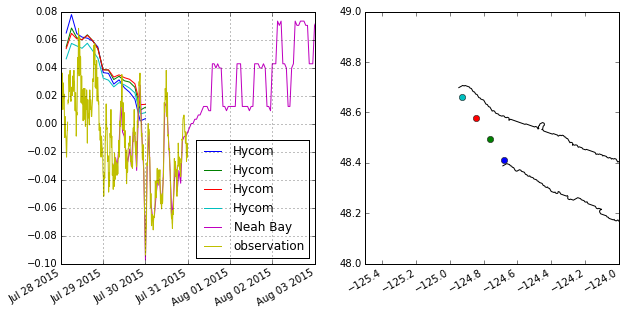

In [16]:
grid_b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

fig,axs= plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
axm=axs[1]
date = datetime.datetime(2015,7,20)

#Hycom
iss = np.arange(1934,1920,-1)
jss = np.arange(1661,1665)
f = nc.Dataset(url)
ssh = f.variables['ssh']
time = f.variables['time']
dates = nc.num2date(time[:],time.units)
lat = f.variables['lat']
lon=f.variables['lon']
for i,j in zip(iss,jss):
    #filename = read_url(date,i,j) read website
    ax.plot(dates,ssh[:,0,j,i],label='Hycom')
    axm.plot(lon[i]-360,lat[j],'o')
viz_tools.plot_coastline(axm,grid_b,coords='map')


#Neah Bay forecast
filename = '/ocean/nsoontie/MEOPAR/sshNeahBay/txt/sshNB_2015-07-30_21.txt'
NBdata = residuals._load_surge_data(filename)
surge, dates = residuals._retrieve_surge(NBdata, datetime.datetime(2015,7,29))
ax.plot(dates[:],surge[:],label = 'Neah Bay')

# Neah Bay observations
obs = figures.get_NOAA_wlevels(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '30-Jul-2015')
tides = figures.get_NOAA_tides(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '30-Jul-2015')

res = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)
ax.plot(obs.time,res,label='observation')


axm.set_xlim([-125.5,-124])
axm.set_ylim([48,49])
ax.legend(loc=0)
ax.grid()
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2015,7,28),datetime.datetime(2015,8,3)])

Hycom nowcast is not an observation but doesnt' look bad.

* Accessing July 30 nowcast gives data for July 28-29

In [17]:
date = '20150731'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_2ds_nowcast_3hrly_diag'.format(date))
f = nc.Dataset(url)
ssh=f.variables['ssh']
time = f.variables['time']
dates=nc.num2date(time[:],time.units)
lon=f.variables['lon']

(735807.0, 735813.0)

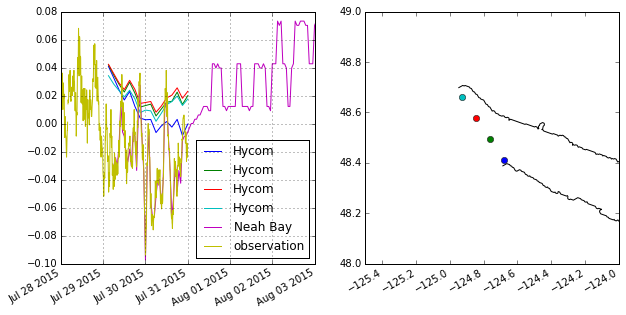

In [18]:
grid_b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

fig,axs= plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
axm=axs[1]
date = datetime.datetime(2015,7,20)

#Hycom
iss = np.arange(1934,1920,-1)
jss = np.arange(1661,1665)
f = nc.Dataset(url)
ssh = f.variables['ssh']
time = f.variables['time']
dates = nc.num2date(time[:],time.units)
lat = f.variables['lat']
lon=f.variables['lon']
for i,j in zip(iss,jss):
    #filename = read_url(date,i,j) read website
    ax.plot(dates,ssh[:,0,j,i],label='Hycom')
    axm.plot(lon[i]-360,lat[j],'o')
viz_tools.plot_coastline(axm,grid_b,coords='map')


#Neah Bay forecast
filename = '/ocean/nsoontie/MEOPAR/sshNeahBay/txt/sshNB_2015-07-30_21.txt'
NBdata = residuals._load_surge_data(filename)
surge, dates = residuals._retrieve_surge(NBdata, datetime.datetime(2015,7,29))
ax.plot(dates[:],surge[:],label = 'Neah Bay')

# Neah Bay observations
obs = figures.get_NOAA_wlevels(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '30-Jul-2015')
tides = figures.get_NOAA_tides(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '30-Jul-2015')

res = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)
ax.plot(obs.time,res,label='observation')


axm.set_xlim([-125.5,-124])
axm.set_ylim([48,49])
ax.legend(loc=0)
ax.grid()
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2015,7,28),datetime.datetime(2015,8,3)])

* Accessing July 31 nowcast gives data for July 29 and 30.

#Temperature and salinty

In [19]:
date = '20150730'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_3dz_nowcast_6hrly_reg2'.format(date))

In [20]:
f=nc.Dataset(url)

In [21]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    title: 3D Volume 6hrly Region 2 00Z28jul2015: Nowcast downloaded Jul 30 05:12 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Thu Jul 30 05:13:18 GMT 2015 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(1600), lev(40), lon(1000), time(9)
    variables(dimensions): float64 time(time), float64 lev(lev), float64 lat(lat), float64 lon(lon), float32 salinity(time,lev,lat,lon), float32 temperature(time,lev,lat,lon), float32 u(time,lev,lat,lon), float32 v(time,lev,lat,lon)
    groups: 

In [22]:
sal=f.variables['salinity']
lon=f.variables['lon']
lat=f.variables['lat']
dep=f.variables['lev']

<matplotlib.colorbar.Colorbar instance at 0x7f0471343908>

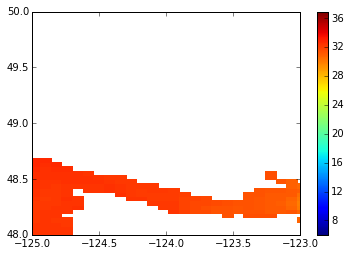

In [23]:
plt.pcolormesh(lon[:], lat[:],sal[1,0,:,:])
plt.axis([-125,-123,48,50])
plt.colorbar()

In [24]:
iss = np.where(np.logical_and(lon[:]<-124.5, lon[:] > -125))
jss = np.where(np.logical_and(lat[:] > 48.4, lat[:] < 48.6))

In [25]:
jss

(array([1011, 1012, 1013, 1014, 1015]),)

In [26]:
iss

(array([412, 413, 414, 415, 416, 417]),)

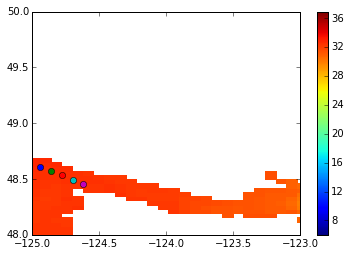

In [27]:
plt.pcolormesh(lon[:], lat[:],sal[1,0,:,:])
plt.axis([-125,-123,48,50])
plt.colorbar()

for i,j in zip(iss[0][0:-1],jss[0][::-1]+1):
    plt.plot(lon[i],lat[j],'o')

<matplotlib.colorbar.Colorbar instance at 0x7f047149e098>

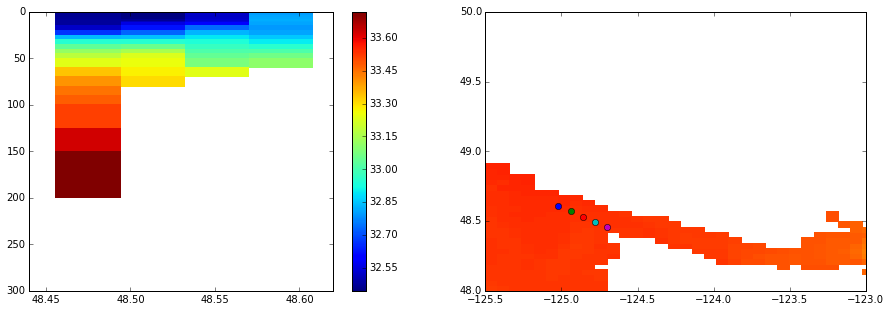

In [28]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[1].pcolormesh(lon[:], lat[:],sal[1,0,:,:])
axs[1].set_xlim([-125.5,-123])
axs[1].set_ylim([48,50])

new_sal = np.ma.zeros((40,5))
new_lat=np.zeros(5)
count=0
for i,j in zip(iss[0]-1,jss[0][::-1]+1):
    new_sal[:,count] = sal[1,:,j,i]
    new_lat[count] = lat[j]
    count=count+1
    axs[1].plot(lon[i],lat[j],'o')
mesh=axs[0].pcolormesh(new_lat, dep[:],new_sal)
axs[0].set_ylim([300,0])
plt.colorbar(mesh,ax=axs[0])




Is it possible to interpolate this product onto our bcs?

[32, 34, 300, 0]

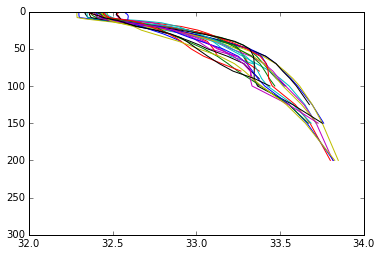

In [29]:
for i in iss[0]:
    for j in jss[0]:
        plt.plot(sal[1,:,j,i],dep[:])
plt.axis([32,34,300,0])

I don't think this is getting as fresh as our model is in the surface. 

Does this model account for river discharge? Probably not. 

Maybe it could be useful for the deep water an upwelling? But it isn't very deep...

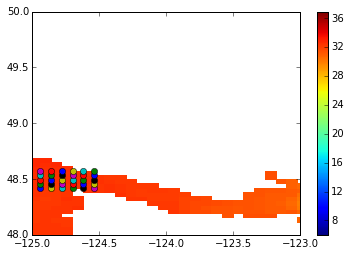

In [31]:
plt.pcolormesh(lon[:], lat[:],sal[1,0,:,:])
plt.axis([-125,-123,48,50])
plt.colorbar()

for i in iss[0]:
    for j in jss[0]:
        plt.plot(lon[i],lat[j],'o')

#Next

* More systematic comparison of HYCOM forecasts with observations - Perhaps 3 houlry averaged obs for fairness?
* Decide about HYCOM nowcasts - is it worth using those when we could use direct observations? But we don't have a full observation for our nowcast system.